In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN



In [4]:
# Load your crime data
# Assuming your data is in a CSV file named 'crime_data.csv'
crime_data = pd.read_csv('crime_data.csv')

In [8]:
# Display the first few rows of the dataset
print(crime_data.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [10]:
# Extract features
features = crime_data.iloc[:, 1:]

In [12]:
# Extract non-numeric column (assuming the first column contains state names)
states = crime_data.iloc[:, 0]

In [14]:
# Standardize the numeric data only
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

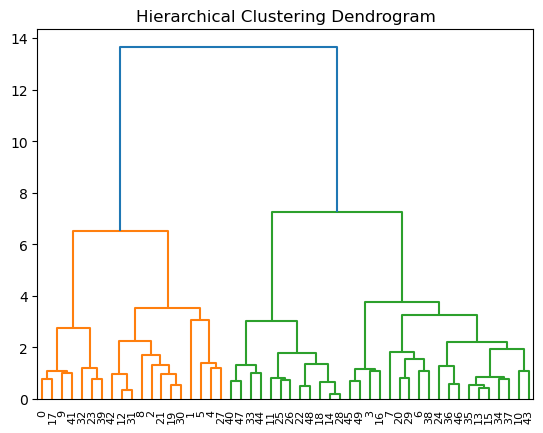

In [15]:
# Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [16]:
# Based on the dendrogram, determine the number of clusters

# K-means Clustering
# Assuming you want to find 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
crime_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
crime_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

In [18]:
# Analyze the results
# You can analyze the clusters formed by each algorithm and draw inferences
# For example, you can use groupby to see the mean values of each cluster
print(crime_data.groupby('KMeans_Cluster').mean())
print(crime_data.groupby('DBSCAN_Cluster').mean())

                   Murder  Assault   UrbanPop      Rape  DBSCAN_Cluster
KMeans_Cluster                                                         
0                5.656250  138.875  73.875000  18.78125            0.00
1               12.165000  255.250  68.400000  29.16500           -0.05
2                3.971429   86.500  51.928571  12.70000            0.00
                   Murder     Assault   UrbanPop       Rape  KMeans_Cluster
DBSCAN_Cluster                                                             
-1              10.000000  263.000000  48.000000  44.500000        1.000000
 0               7.742857  168.877551  65.897959  20.757143        0.959184


C:\Users\Admin\AppData\Local\Temp\ipykernel_3668\3370953267.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(crime_data.groupby('KMeans_Cluster').mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_3668\3370953267.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(crime_data.groupby('DBSCAN_Cluster').mean())


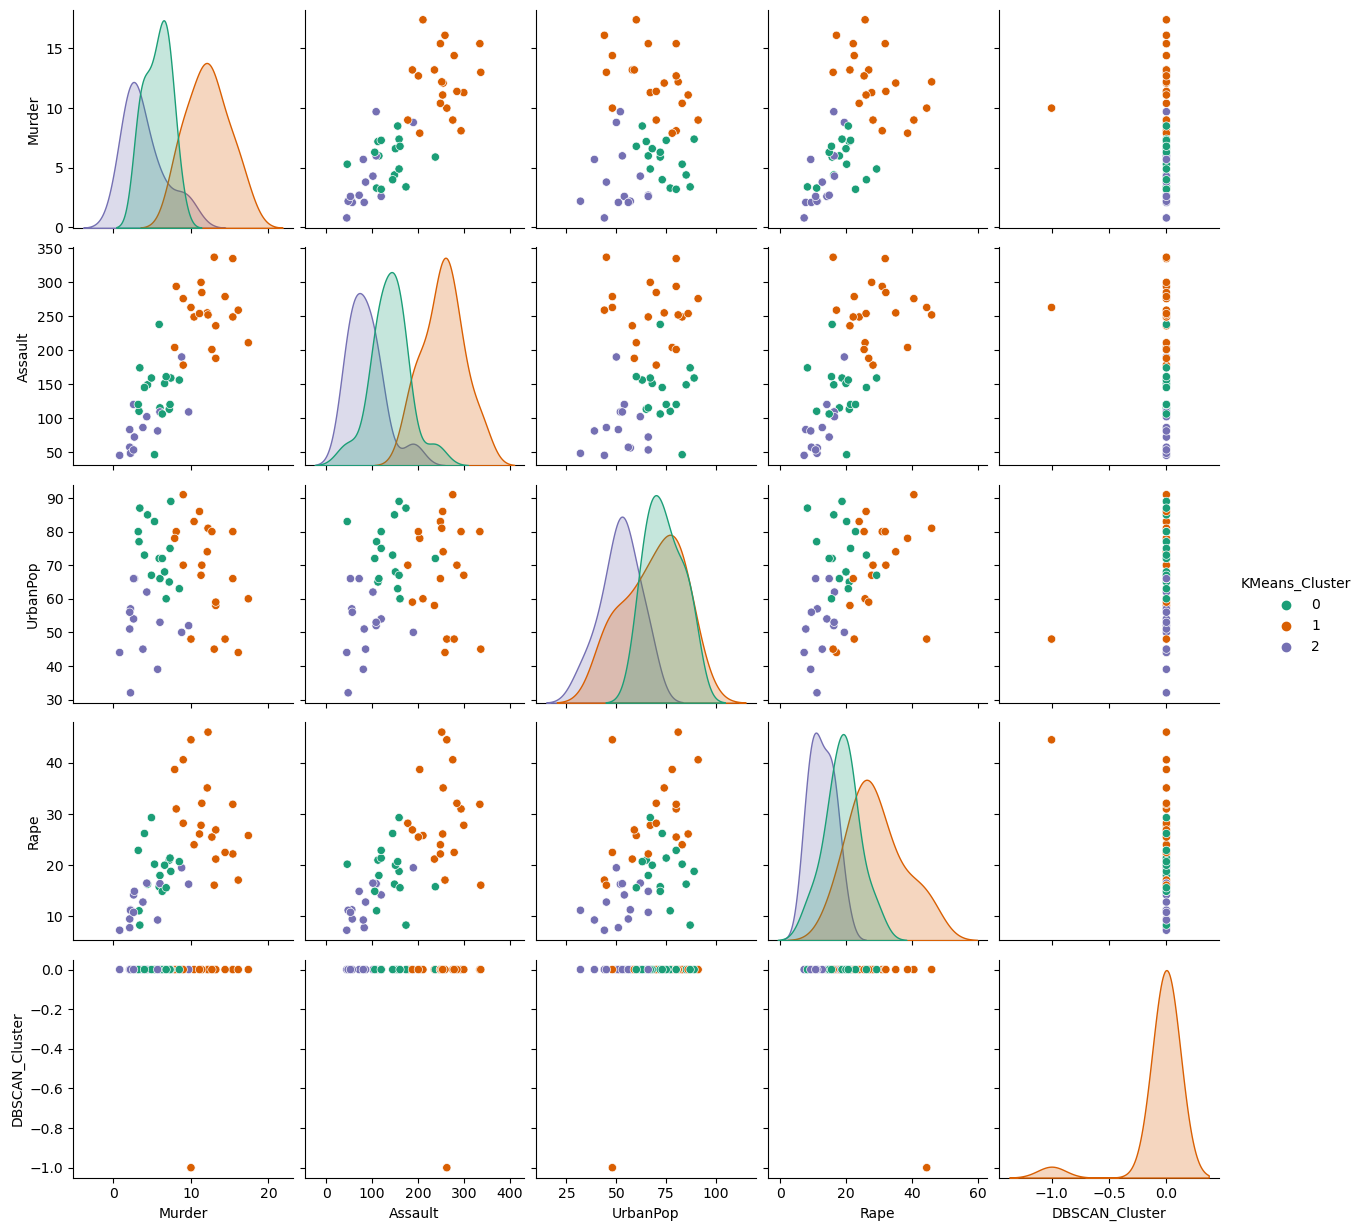

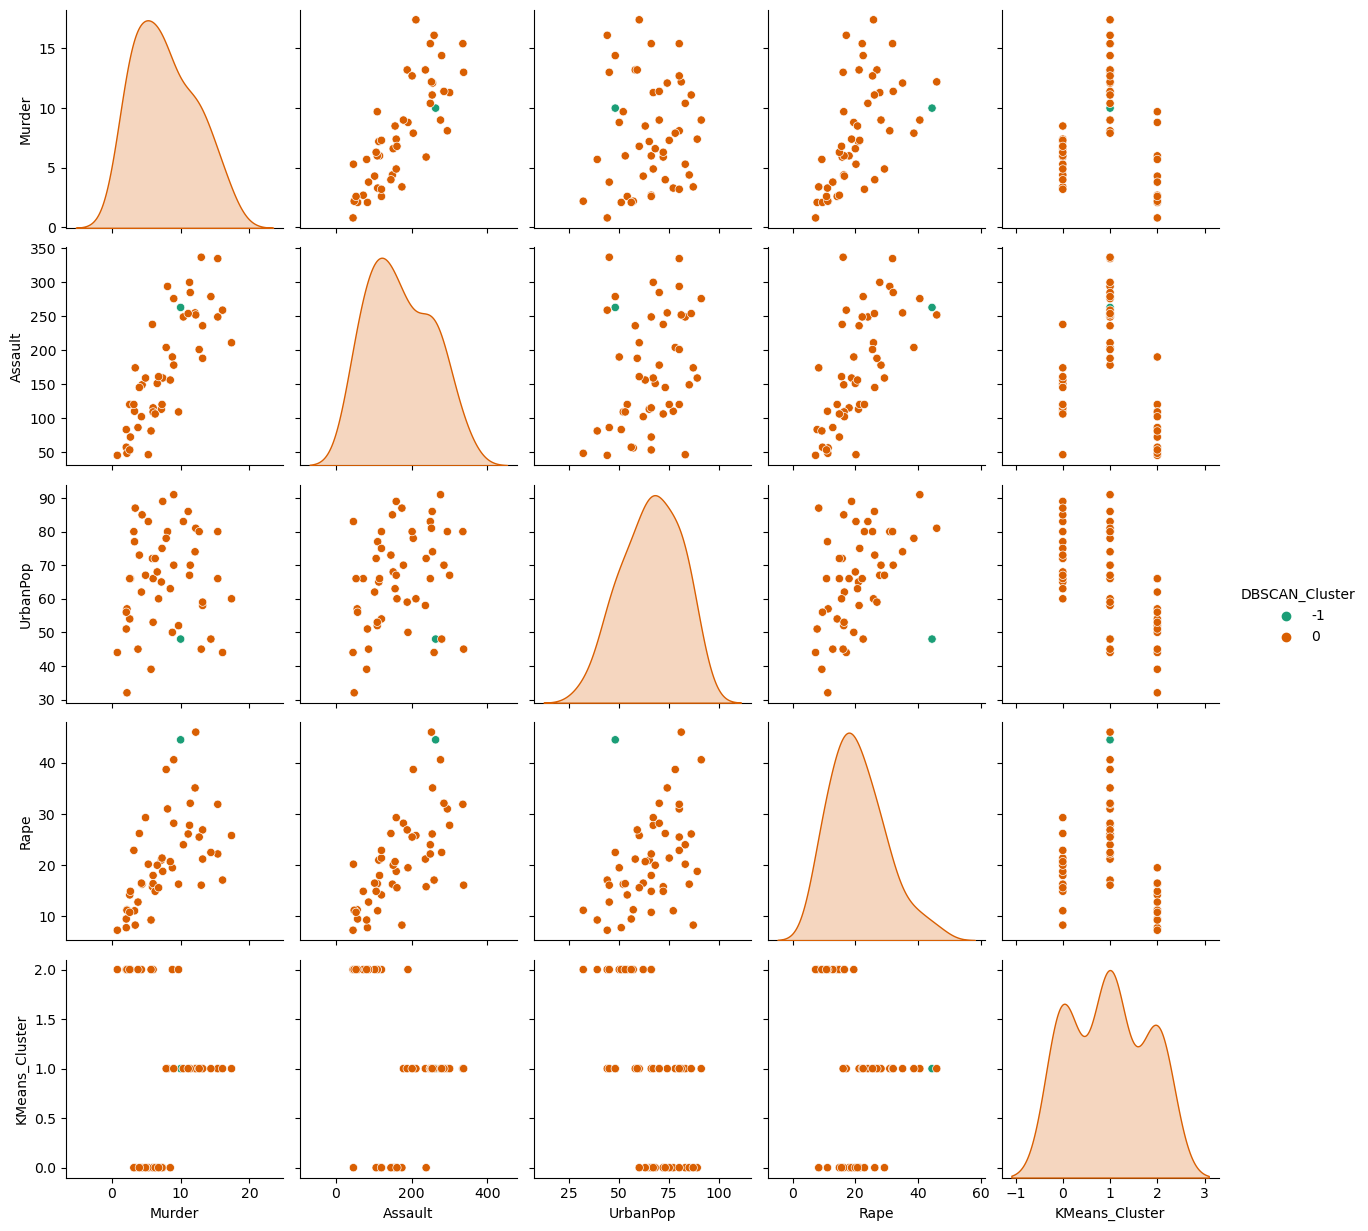

In [19]:
# Visualize the clusters
sns.pairplot(crime_data, hue='KMeans_Cluster', palette='Dark2', diag_kind='kde')
plt.show()
sns.pairplot(crime_data, hue='DBSCAN_Cluster', palette='Dark2', diag_kind='kde')
plt.show()


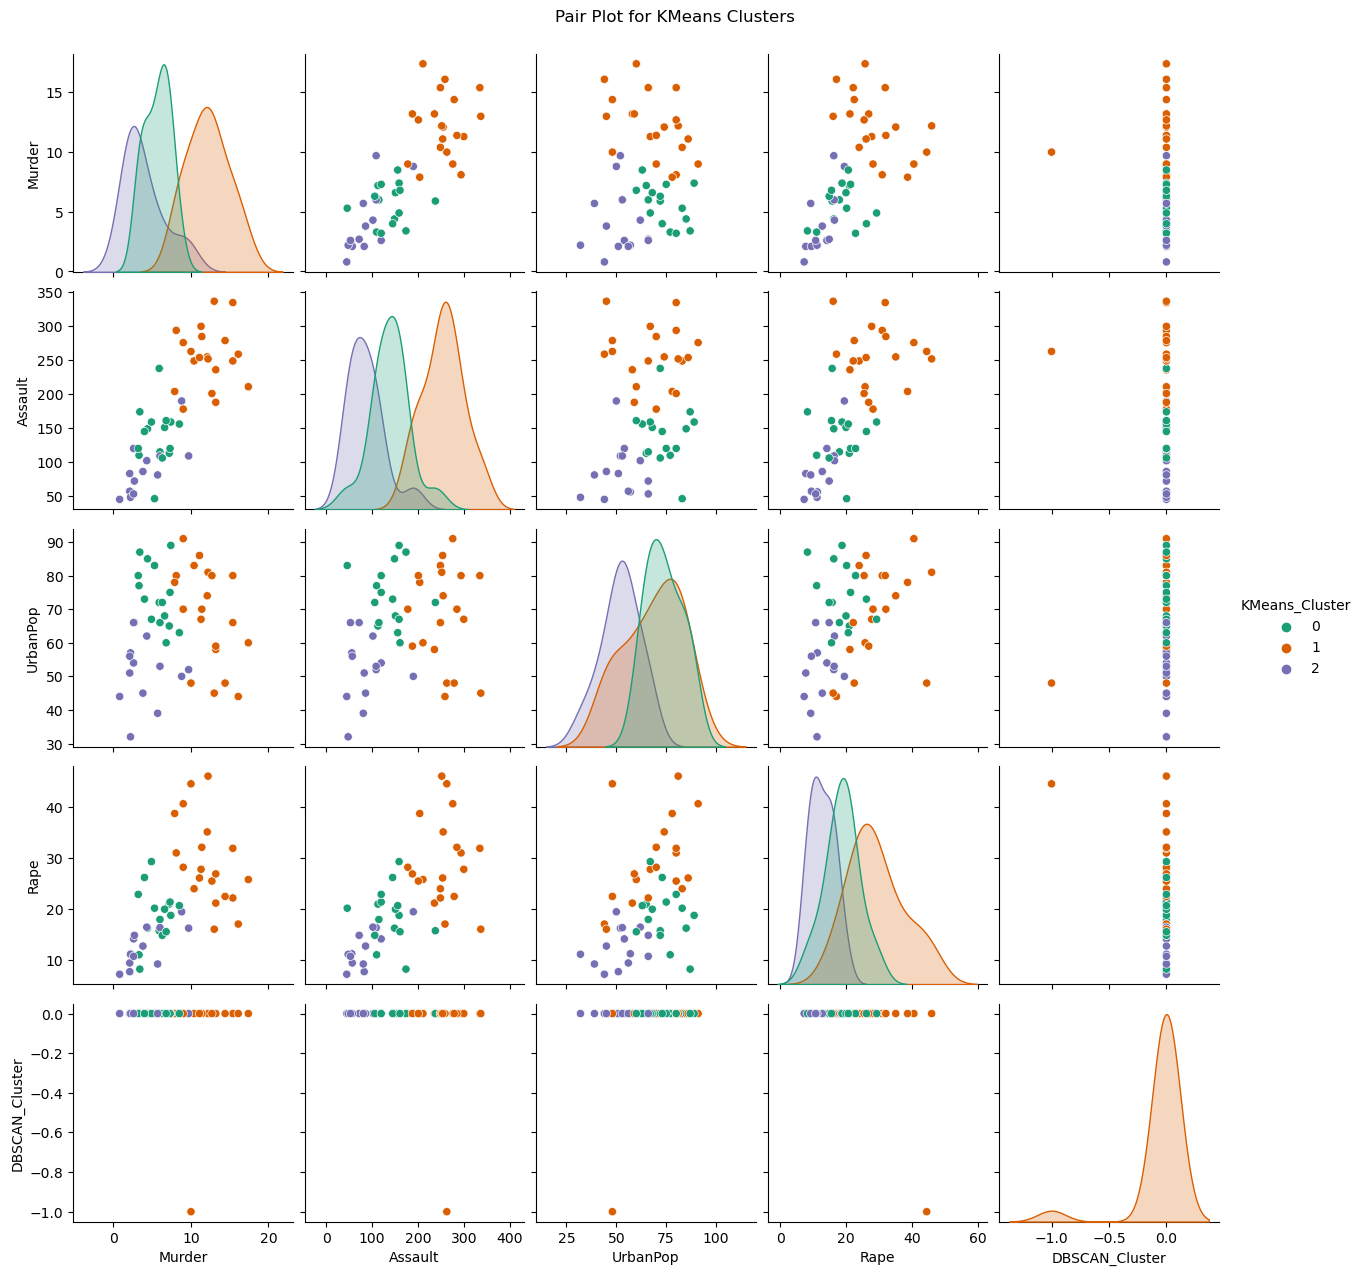

In [20]:
# Visualize the clusters with pair plots
# Pair plots help visualize relationships between different features for each cluster

# Pair plot for KMeans clusters
sns.pairplot(crime_data, hue='KMeans_Cluster', palette='Dark2', diag_kind='kde')
plt.suptitle('Pair Plot for KMeans Clusters', y=1.02)
plt.show()



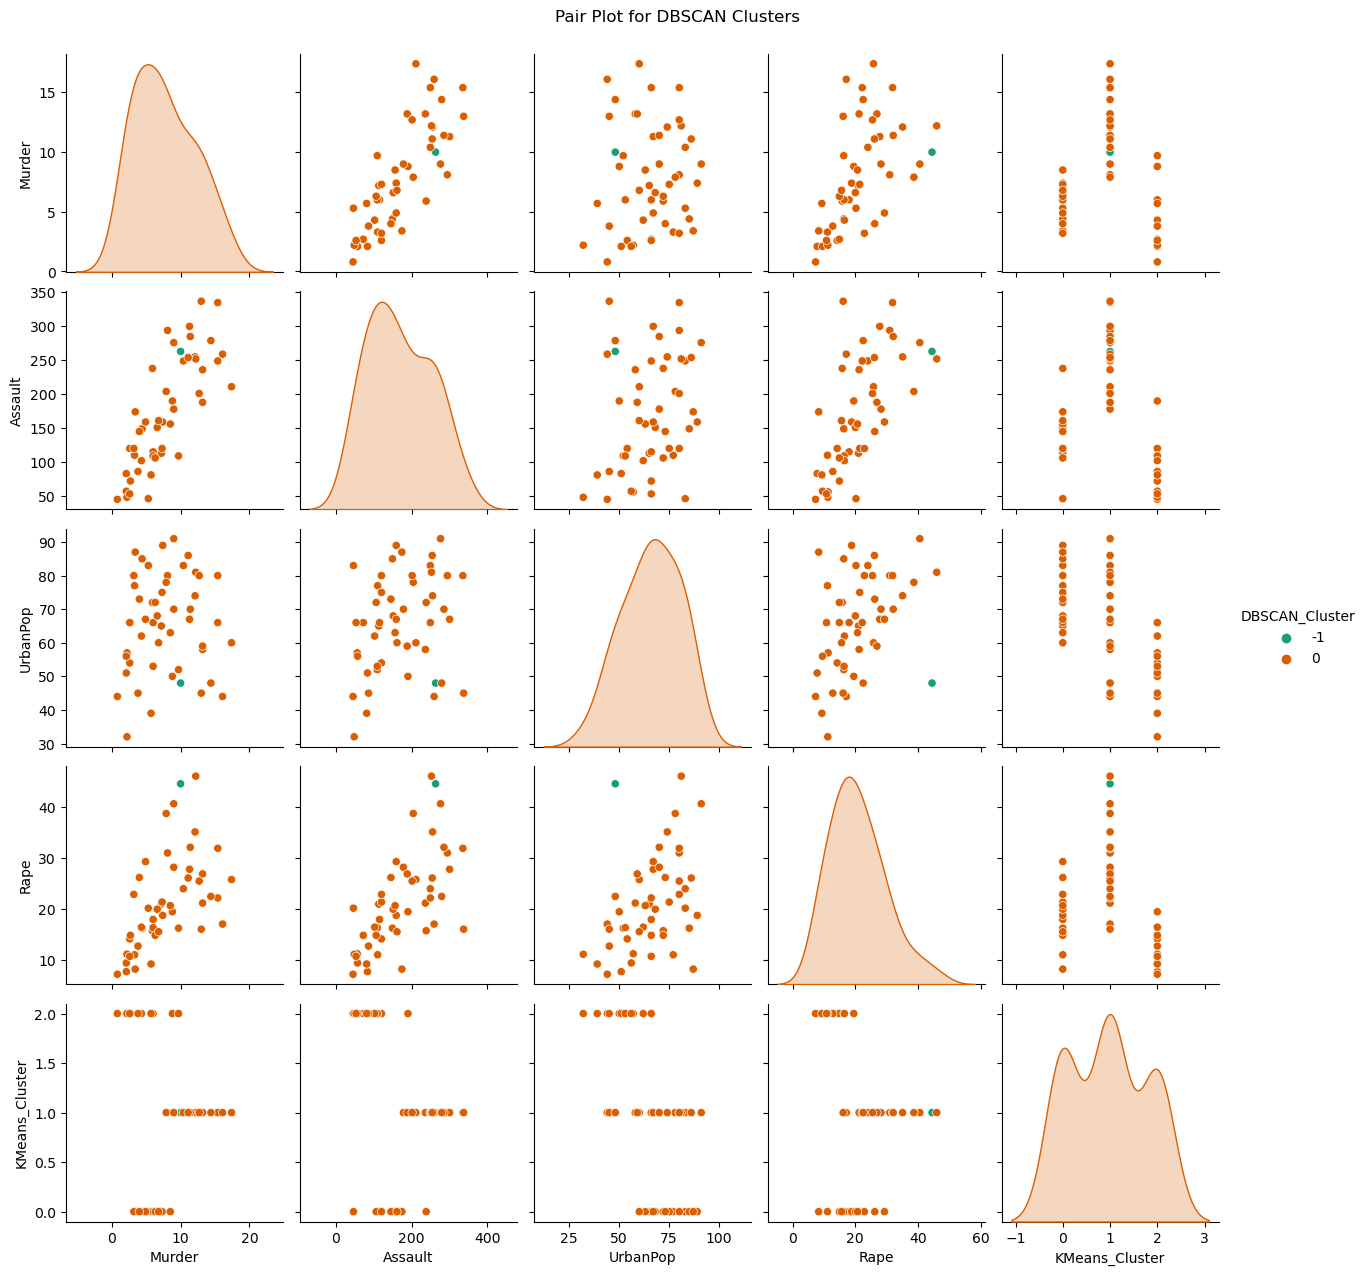

In [21]:
# Pair plot for DBSCAN clusters
sns.pairplot(crime_data, hue='DBSCAN_Cluster', palette='Dark2', diag_kind='kde')
plt.suptitle('Pair Plot for DBSCAN Clusters', y=1.02)
plt.show()